In [ ]:
# Naložimo knjižnjice in funkcije
from sage.all import graphs
import funkcije
import metahevristika
import csv
import time
import os
import pandas as pd

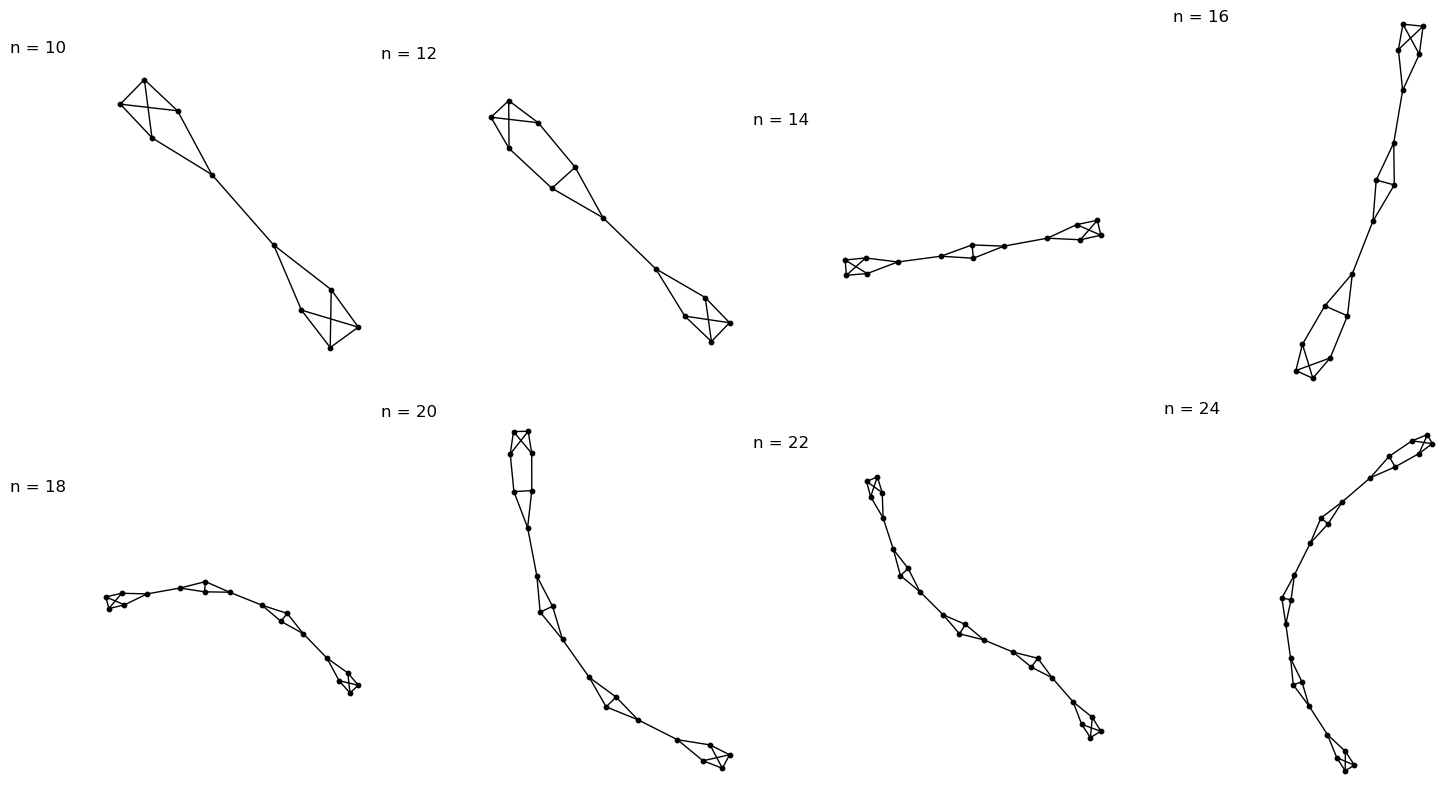

In [ ]:
# Preizkusimo funkcijo Ln_graphs

Ln_plots = []
for n in range(10, 27, 2):
    # narisan graf
    Gplot = Ln_graph(n).plot(
        layout="spring",
        vertex_size=10,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=200
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"n = {n}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    Ln_plots.append(Gplot + title)

row1 = Ln_plots[:4]
row2 = Ln_plots[4:8]

GA = graphics_array([row1, row2])
GA.show(figsize=(15, 8), axes=False)

In [ ]:
# Preverimo koliko je vseh kubičnih grafov za vsak n

for n in range(4,19,2):
    c = sum(1 for _ in cubic_graphs(n))
    print(f"n={n} število grafov: {c}")

n=4 število grafov: 1
n=6 število grafov: 2
n=8 število grafov: 5
n=10 število grafov: 19
n=12 število grafov: 85
n=14 število grafov: 509
n=16 število grafov: 4060
n=18 število grafov: 41301


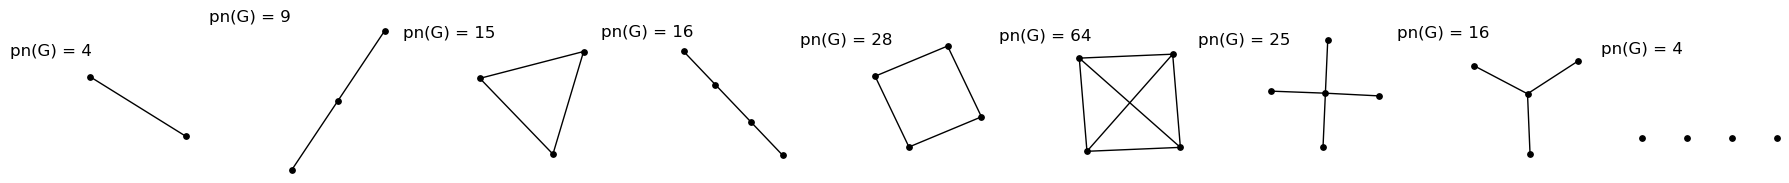

In [ ]:
# preverjamo delovanje funkcije subpath_number na enostavnih grafih
graphs_list = [
    # 2. P2: pot s 2 vozlišči
    Graph({0:[1]}),
    # 3. Zvezda S3: center 0, listi 1 in 2
    Graph({0:[1,2]}),
    # 3. C3: trikotnik
    Graph({0:[1,2], 1:[2]}),
    # 4. Potni graf P4
    Graph({0:[1], 1:[2], 2:[3]}),
    # 4. Cikel C4
    Graph({0:[1,3], 1:[2], 2:[3]}),
    # 4. Popoln graf K4
    graphs.CompleteGraph(4),
    # 4. Zvezda S4
    graphs.StarGraph(4),
    # 4. Drevo v obliki črke T
    Graph({0:[1,2,3]}),
    # 4. Diskretni graf na 4 vozliščih
    Graph(4)
]

plots = []
for G in graphs_list:
    # narisan graf
    Gplot = G.plot(
        layout="spring",
        vertex_size=15,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=200
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"pn(G) = {subpath_number(G)}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    plots.append(Gplot + title)

# prikaz v eni vrstici
graphics_array([plots]).show(figsize=(18,3), axes=False)

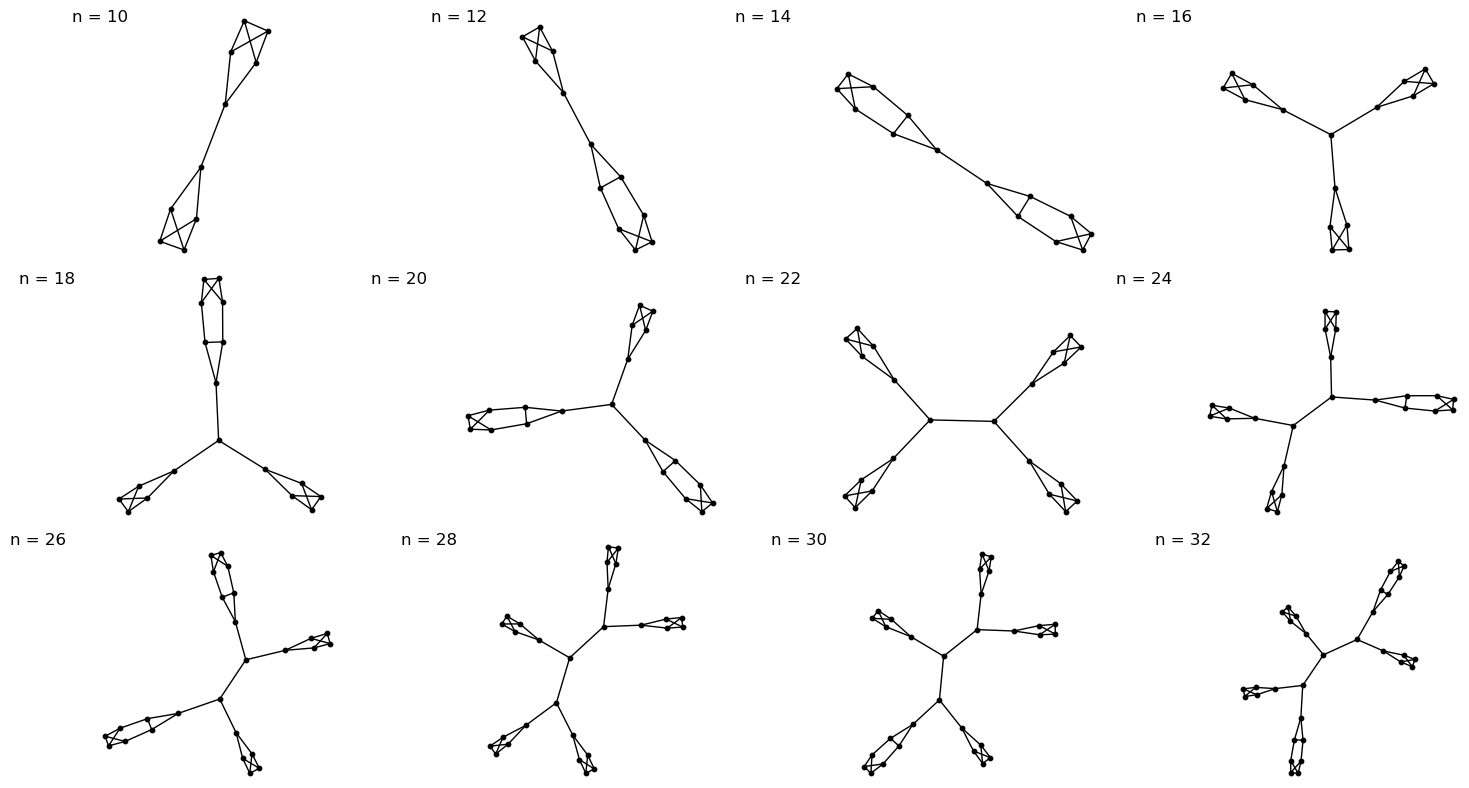

In [ ]:
# Preizkusimo funkcijo build_star

star_plots = []
for n in range(10, 33, 2):
    # narisan graf
    Gplot = build_star(n).plot(
        layout="spring",
        vertex_size=10,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=400
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"n = {n}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    star_plots.append(Gplot + title)

row1 = star_plots[:4]
row2 = star_plots[4:8]
row3 = star_plots[8:12]

GA = graphics_array([row1, row2, row3])
GA.show(figsize=(15, 8), axes=False)

## Prva točka

Tu je cilj preveriti pravilnost trditve za čim večje n, kjer Ln **primerjamo z vsemi možnimi kubičnimi grafi** na n vozliščih

Shranili bomo:

        - CSV boljših grafov od Ln

Za csv n = 16 je trajalo 1,5 min (41301 grafov), za n = 18: 80 min (41301 grafov) -> **za n = 20 je 510489 grafov**

In [ ]:
start_time = time.time()

os.makedirs("Data", exist_ok=True)

for n in range(10, 19, 2):
    file_n = os.path.join("Data", f"boljsi_Ln_n{n}.csv")

    # VAROVALO: če datoteka že obstaja, je ne povozi in preskoči n
    if os.path.exists(file_n):
        print(f"Preskok n = {n} | datoteka že obstaja: {file_n}")
        continue
        
    start = time.time()

    # Ustvari/odpri CSV za trenutni n
    with open(file_n, mode="w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["n", "graph6", "pn(G)", "pn(Ln)", "pn(star)"])

        Ln = Ln_graph(n)
        pn = subpath_number(Ln)
        star = build_star(n)
        pn2 = subpath_number(star)


        written = 0 

        for G in cubic_graphs(n):
            pnG = subpath_number(G)
            if pnG < pn:
                writer.writerow([n, G.graph6_string(), pnG, pn, pn2])
                written += 1

    elapsed_total = time.time() - start_time
    end = time.time() - start

    print(f"Zaključil n = {n} | datoteka: {file_n} | zapisov: {written+1} | čas n: {encode_time_hms(end)} | skupni: {encode_time_hms(elapsed_total)}")


Preskok n = 10 | datoteka že obstaja: Data/boljsi_Ln_n10.csv
Preskok n = 12 | datoteka že obstaja: Data/boljsi_Ln_n12.csv
Preskok n = 14 | datoteka že obstaja: Data/boljsi_Ln_n14.csv
Preskok n = 16 | datoteka že obstaja: Data/boljsi_Ln_n16.csv
Preskok n = 18 | datoteka že obstaja: Data/boljsi_Ln_n18.csv


In [ ]:
folder = "Data"
dfs = []

for file in os.listdir(folder):
    if file.lower().endswith(".csv"):
        path = os.path.join(folder, file)
        df = pd.read_csv(path)
        df["source_file"] = file  # dodamo informacijo, iz katere datoteke prihaja
        dfs.append(df)

df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()
df

,n,graph6,pn(G),pn(Ln),pn(star),source_file
0,18,Q????A?WC`QCF?B_@W?M?WO@_O?,22464,22532,7072,boljsi_Ln_n18.csv
1,18,Q????A?WC`QCF?Ao@W?M?X?@_O?,16908,22532,7072,boljsi_Ln_n18.csv
2,18,Q????B?K?WWOo_KCEG?F?BO?KG?,7692,22532,7072,boljsi_Ln_n18.csv
3,18,Q????B?K?WWCw?CcCW?e?BO?KG?,20064,22532,7072,boljsi_Ln_n18.csv
4,18,Q????B?K?WWCw??sCW?e?F??KG?,21516,22532,7072,boljsi_Ln_n18.csv
5,18,Q????B?K?WWCo_KCCW?e?BO?KG?,17440,22532,7072,boljsi_Ln_n18.csv
6,18,Q????B?K?WWCo_GSEG?e?B_?KG?,7488,22532,7072,boljsi_Ln_n18.csv
7,18,Q???C@?g?oGcPGgOCQ?M?E_?WG?,16512,22532,7072,boljsi_Ln_n18.csv
8,18,Q???C@?g?oSAPGPGCW?M?E_?WG?,12832,22532,7072,boljsi_Ln_n18.csv
9,18,Q???C@?g?oSAEAEOCgAK?@g@A_?,19392,22532,7072,boljsi_Ln_n18.csv


7072


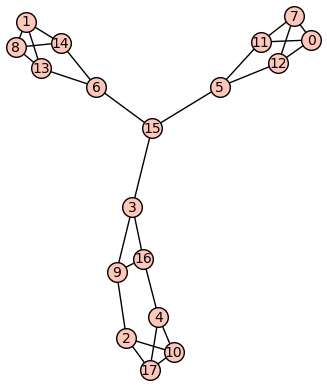

7296


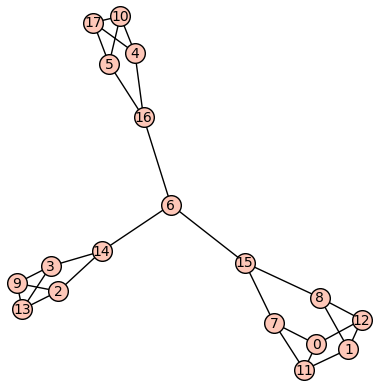

7380


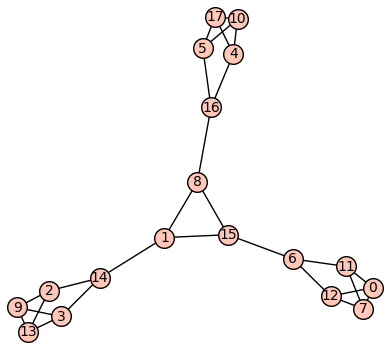

In [ ]:
df_f = df[df["n"] == 18].copy()
df_f = df_f.sort_values("pn(G)")
df_min3 = df_f.head(int(3))
slov = dict(zip(df_min3["graph6"], df_min3["pn(G)"]))

for G6, pn in slov.items():
    G = Graph(G6)
    print(pn)
    G.show()

Zaključil n = 10 v času 00:00:01.513, best_E = 1276


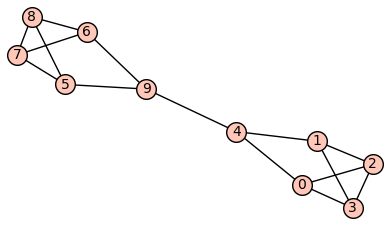

Zaključil n = 12 v času 00:00:03.563, best_E = 3076


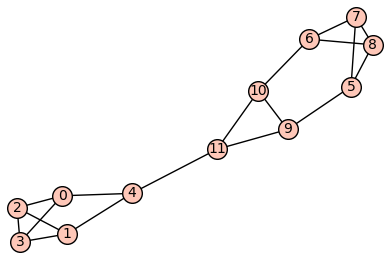

Zaključil n = 14 v času 00:00:05.334, best_E = 5504


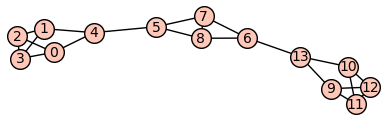

Zaključil n = 16 v času 00:00:09.845, best_E = 8248


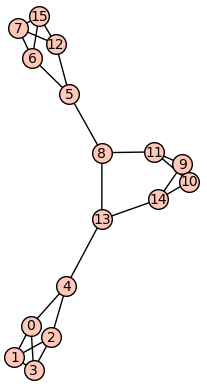

Zaključil n = 18 v času 00:00:15.990, best_E = 7072


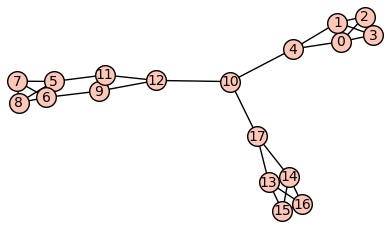

Zaključil n = 20 v času 00:00:29.963, best_E = 14212


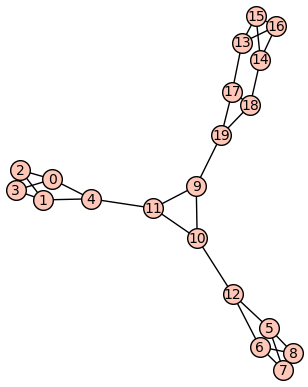

Zaključil n = 22 v času 00:00:44.408, best_E = 20580


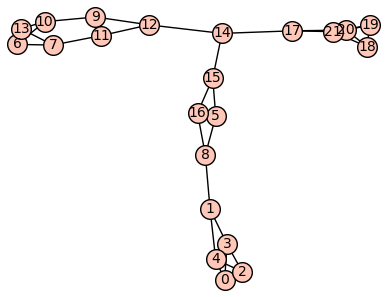

In [74]:
for n in range(10, 23, 2):
    Ln = Ln_graph(n)  # ali build_star2(n)

    start = time.time()
    best_G, best_E, history = simulated_annealing_subpath(
        Ln,
        steps=1000,
        T0=1.0,
        alpha=0.999,
        verbose=False
    )
    elapsed = time.time() - start
    print(f"Zaključil n = {n} v času {encode_time_hms(elapsed)}, best_E = {best_E}")
    best_G.show()


In [77]:
for n in range(14, 101, 6):
    G2 = build_star(n)
    G3 = build_star2(n)
    pn2 = subpath_number(G2)
    pn3 = subpath_number(G3)
    print(f"n = {n} | star1: {pn2} | star2: {pn3} | {pn3 <= pn2}")
    

n = 14 | star1: 7188 | star2: 5504 | True
n = 20 | star1: 12816 | star2: 11708 | True
n = 26 | star1: 19596 | star2: 19064 | True
n = 32 | star1: 27528 | star2: 27572 | False
n = 38 | star1: 36612 | star2: 37232 | False
n = 44 | star1: 46848 | star2: 48044 | False
n = 50 | star1: 58236 | star2: 60008 | False
n = 56 | star1: 70776 | star2: 73124 | False
n = 62 | star1: 84468 | star2: 87392 | False
n = 68 | star1: 99312 | star2: 102812 | False
n = 74 | star1: 115308 | star2: 119384 | False
n = 80 | star1: 132456 | star2: 137108 | False
n = 86 | star1: 150756 | star2: 155984 | False
n = 92 | star1: 170208 | star2: 176012 | False
n = 98 | star1: 190812 | star2: 197192 | False
